## 1 Map Search
This example illustrates two types of classic search-based algorithms –– breadth-first search (BFS) and depth-first search (DFS).

In [3]:
BEIJING, CHANGCHUN, URUMQI, WUHAN, GUANGZHOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN URUMQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()
# 字符串赋值以检测字符串的输入错误

In [47]:
connection = {
    CHANGCHUN: [BEIJING],
    URUMQI: [BEIJING],
    BEIJING: [URUMQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    SHANGHAI: [NEWYORK, WUHAN],
    NEWYORK: [BEIJING, SHANGHAI],
    WUHAN: [SHANGHAI, BEIJING, GUANGZHOU],
    GUANGZHOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUANGZHOU]
}
# note that "connection" is a dictionary

In [5]:
import networkx as nx

In [6]:
%matplotlib inline

In [8]:
graph = connection
g = nx.Graph (graph)

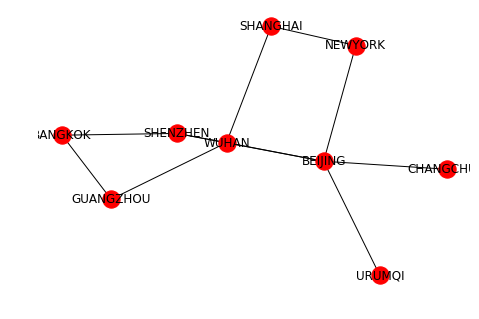

In [14]:
pos = nx.spring_layout(g)
nx.draw(g,pos)
labels=nx.draw_networkx_labels(g,pos)
# add city name for easier read of the graph

In [27]:
def navigator(start, destination, connection_graph):
    """Define a procedure that takes three inputs, name of the starting city (string),
    name of the destination city (string), and a connection graph (dictionary)
    to find the shortest path between two cities"""
    
    pathes = [[start]]
    seen = set() # define an empty set 
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in seen: continue  # avoid travelling back
        
        successors = connection_graph[frontier]
        
        for s in successors:
            if s == destination:
                path.append(s)
                return path
            else:
                pathes.append(path + [s])
                
        pathes = sorted(pathes, key = len) # least travel steps
        seen.add(frontier)

In [30]:
navigator(URUMQI, BANGKOK, connection)

['URUMQI', 'BEIJING', 'SHENZHEN', 'BANGKOK']

In [56]:
def navigator_bfs(start, destination, connection_graph):
    """Define a navigating procedure using the BFS approach
    to find all feasible pathes between two cities """
    
    pathes = [start ]
    seen = set()
    
    while pathes:
        frontier = pathes.pop(0)
        
        if frontier in seen: continue
        
        successors = connection_graph[frontier]
        print('standing on {} and looking forward to {}'.format(frontier, successors))
        pathes =  pathes + successors

        seen.add(frontier)

In [57]:
navigator_bfs(CHANGCHUN, SHENZHEN, connection)

standing on CHANGCHUN and looking forward to ['BEIJING']
standing on BEIJING and looking forward to ['URUMQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
standing on URUMQI and looking forward to ['BEIJING']
standing on WUHAN and looking forward to ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
standing on SHENZHEN and looking forward to ['WUHAN', 'BANGKOK']
standing on NEWYORK and looking forward to ['BEIJING', 'SHANGHAI']
standing on SHANGHAI and looking forward to ['NEWYORK', 'WUHAN']
standing on GUANGZHOU and looking forward to ['WUHAN', 'BANGKOK']
standing on BANGKOK and looking forward to ['SHENZHEN', 'GUANGZHOU']


In [49]:
def navigator_dfs(start, destination, connection_graph):
    """Define a navigating procedure using the DFS approach
    to find all feasible pathes between two cities """
    
    pathes = [start ]
    seen = set() 
    
    while pathes:
        frontier = pathes.pop(0)
        
        if frontier in seen: continue
            
        successors = connection_graph[frontier]
        print('standing on {} and looking forward to {}'.format(frontier, successors))
        pathes = successors + pathes # the key difference between the BFS approach!
        
        seen.add(frontier)
        return pathes

In [50]:
navigator_dfs(CHANGCHUN, SHENZHEN, connection)

standing on CHANGCHUN and looking forward to ['BEIJING']
standing on BEIJING and looking forward to ['URUMQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
standing on URUMQI and looking forward to ['BEIJING']
standing on WUHAN and looking forward to ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
standing on SHANGHAI and looking forward to ['NEWYORK', 'WUHAN']
standing on NEWYORK and looking forward to ['BEIJING', 'SHANGHAI']
standing on GUANGZHOU and looking forward to ['WUHAN', 'BANGKOK']
standing on BANGKOK and looking forward to ['SHENZHEN', 'GUANGZHOU']
standing on SHENZHEN and looking forward to ['WUHAN', 'BANGKOK']


In [51]:
def draw_route(routes):
    "Define a function to draw the traveling itinerary"
    print ('-->'.join(routes))

In [60]:
draw_route (navigator(CHANGCHUN, BANGKOK, connection))

CHANGCHUN-->BEIJING-->SHENZHEN-->BANGKOK


In [61]:
# illustrating the difference between BFS and DFS with a simpler example
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

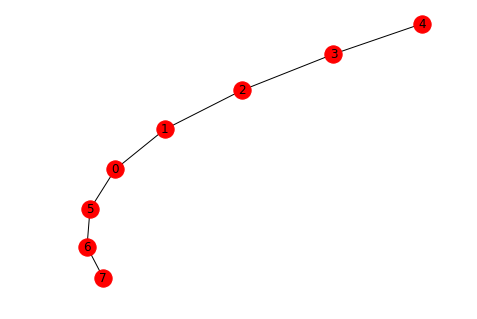

In [62]:
pos = nx.spring_layout(nx.Graph(connection_2))
nx.draw(nx.Graph(connection_2),pos)
labels=nx.draw_networkx_labels(nx.Graph(connection_2),pos)

In [63]:
navigator_bfs(0, 7, connection_2)

standing on 0 and looking forward to [1, 5]
standing on 1 and looking forward to [0, 2]
standing on 5 and looking forward to [0, 6]
standing on 2 and looking forward to [1, 3]
standing on 6 and looking forward to [5, 7]
standing on 3 and looking forward to [2, 4]
standing on 7 and looking forward to [6]
standing on 4 and looking forward to [3]


In [64]:
navigator_dfs(0, 7, connection_2)

standing on 0 and looking forward to [1, 5]
standing on 1 and looking forward to [0, 2]
standing on 2 and looking forward to [1, 3]
standing on 3 and looking forward to [2, 4]
standing on 4 and looking forward to [3]
standing on 5 and looking forward to [0, 6]
standing on 6 and looking forward to [5, 7]
standing on 7 and looking forward to [6]


## 2 Sentence Generation
In this example, we define procedures to randomly generate sentences/expressions following a pre-specified grammar. And the grammars defined here follow the Backus-Naur form.

In [65]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [66]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [67]:
import random

In [68]:
def parse_grammar(grammar_str, sep):
    """Define a procedure that parses the strings of defined grammar"""
    grammar = {}
    for line in grammar_str.split('\n'):
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
        
    return grammar

In [70]:
g = parse_grammar(grammar, '=>')

In [72]:
g

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [73]:
def generate(grammar_parsed, target):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(generate(grammar_parsed, target=r) for r in rule if r!='null')

In [77]:
generate(g, 'sentence')

'一个好看的小猫听着这个蓝色的桌子'

In [81]:
print(generate(parse_grammar(decimal_grammar, '='), target='expression'))

0*57+0-27
